# Rede Neural para previsão de vazão de água de hidrelética

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Ecomp-Poli-UPE_logo.svg/1200px-Ecomp-Poli-UPE_logo.svg.png" alt="logo-poli-ecomp" width="500" height="250">

**Escola Politécnica de Pernambuco**

**Disciplina:** Redes Neurais

**Docente:** Meuser Valença

**Discentes:** Marcos Prudêncio, Eduardo Dubeux e Vinicyus Santos

**Recife, 2025**

## Definição do problema

## Preparação dos Dados

### Bibliotecas e Dataset

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale


In [196]:
# Lendo o dataset
df = pd.read_excel("Vazões_Diárias_1931_2016_RESUMIDA_FURNAS.xls")
df.head()

,Unnamed: 0,FURNAS (6)
0,NaN,NaN
1,1/jan/1931,1996.0
2,2/jan/1931,1959.0
3,3/jan/1931,1937.0
4,4/jan/1931,1837.0


In [197]:
# Dando nome as colunas
df.columns = ["data", "vazao"]
df.head()


,data,vazao
0,NaN,NaN
1,1/jan/1931,1996.0
2,2/jan/1931,1959.0
3,3/jan/1931,1937.0
4,4/jan/1931,1837.0


In [198]:
# Garantir que a coluna Data esteja no formato datetime para visualizacao
locale.setlocale(locale.LC_TIME, "pt_BR.UTF-8")

# Converter datas em formato "1/fev/1931"
df_view = df.copy()
df_view['Data'] = pd.to_datetime(df_view['data'], format="%d/%b/%Y", errors="coerce")

print(df)

              data    vazao
0              NaN      NaN
1       1/jan/1931  1996.00
2       2/jan/1931  1959.00
3       3/jan/1931  1937.00
4       4/jan/1931  1837.00
...            ...      ...
31408  27/dez/2016   548.79
31409  28/dez/2016   526.43
31410  29/dez/2016   519.20
31411  30/dez/2016   518.89
31412  31/dez/2016   498.37

[31413 rows x 2 columns]


### Análise Estatística

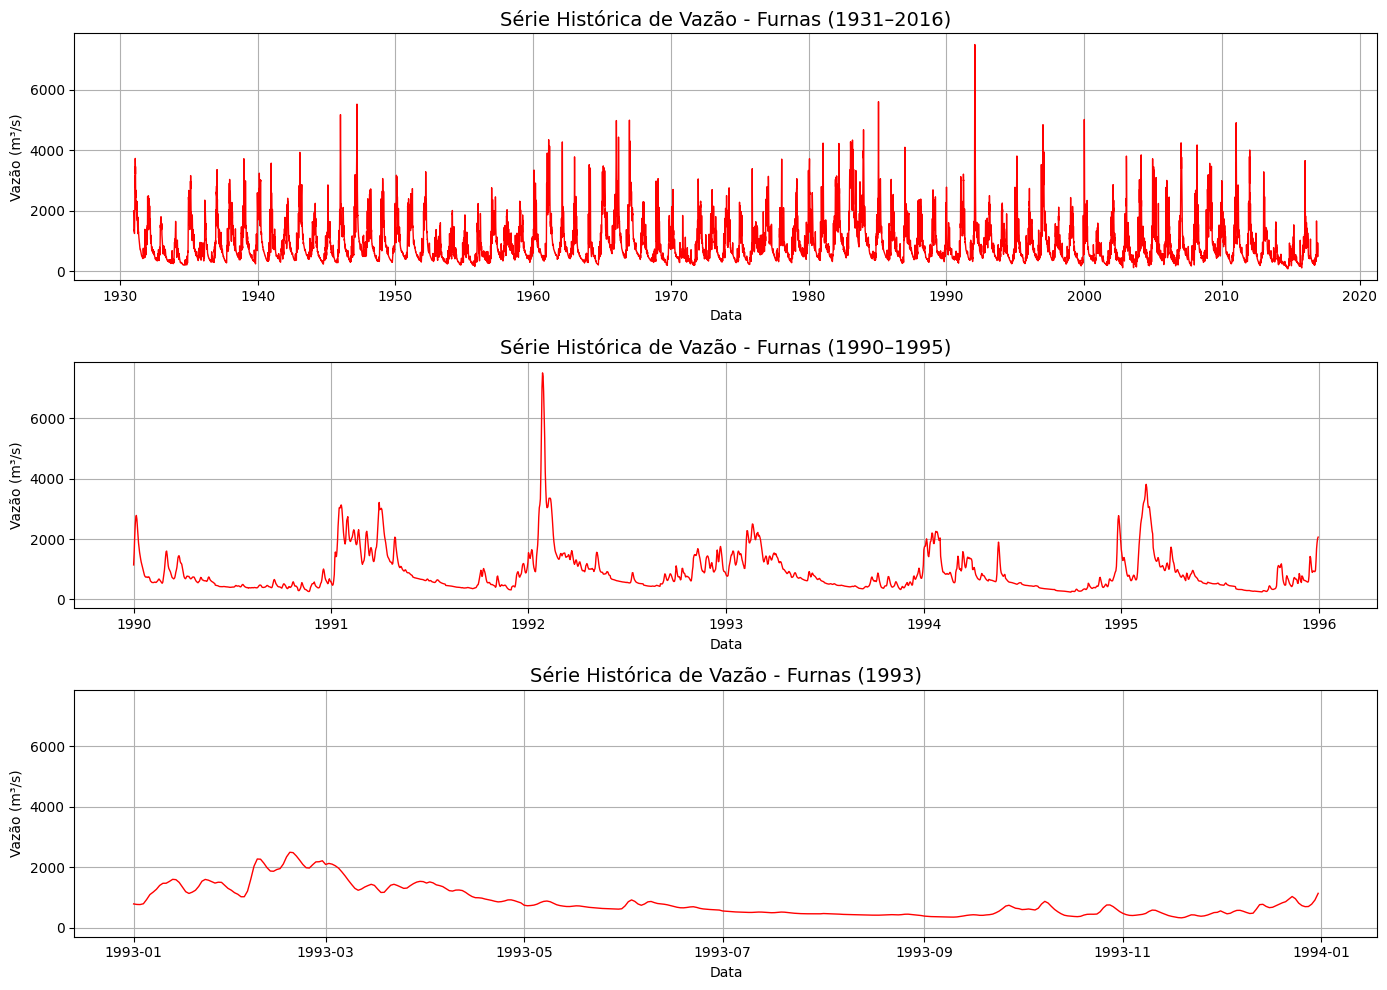

In [199]:

# Visualização geral e exemplo mais específico da série temporal
df_9095 = df_view[(df_view['Data'] >= "1990-01-01") & (df_view['Data'] <= "1995-12-31")]
df_93 = df_view[(df_view['Data'] >= "1993-01-01") & (df_view['Data'] <= "1993-12-31")]


fig, axes = plt.subplots(3, 1, figsize=(14,10), sharey=True)

axes[0].plot(df_view['Data'], df_view['vazao'], color='red', linewidth=1)
axes[0].set_title("Série Histórica de Vazão - Furnas (1931–2016)", fontsize=14)
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Vazão (m³/s)")
axes[0].grid(True)

axes[1].plot(df_9095['Data'], df_9095['vazao'], color='red', linewidth=1)
axes[1].set_title("Série Histórica de Vazão - Furnas (1990–1995)", fontsize=14)
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Vazão (m³/s)")
axes[1].grid(True)

axes[2].plot(df_93['Data'], df_93['vazao'], color='red', linewidth=1)
axes[2].set_title("Série Histórica de Vazão - Furnas (1993)", fontsize=14)
axes[2].set_xlabel("Data")
axes[2].set_ylabel("Vazão (m³/s)")
axes[2].grid(True)



plt.tight_layout()
plt.show()

📊 Estatísticas descritivas:
count    31412.000000
mean       906.478028
std        686.152601
min         75.000000
25%        447.705000
50%        665.000000
75%       1139.000000
max       7497.000000
Name: vazao, dtype: float64


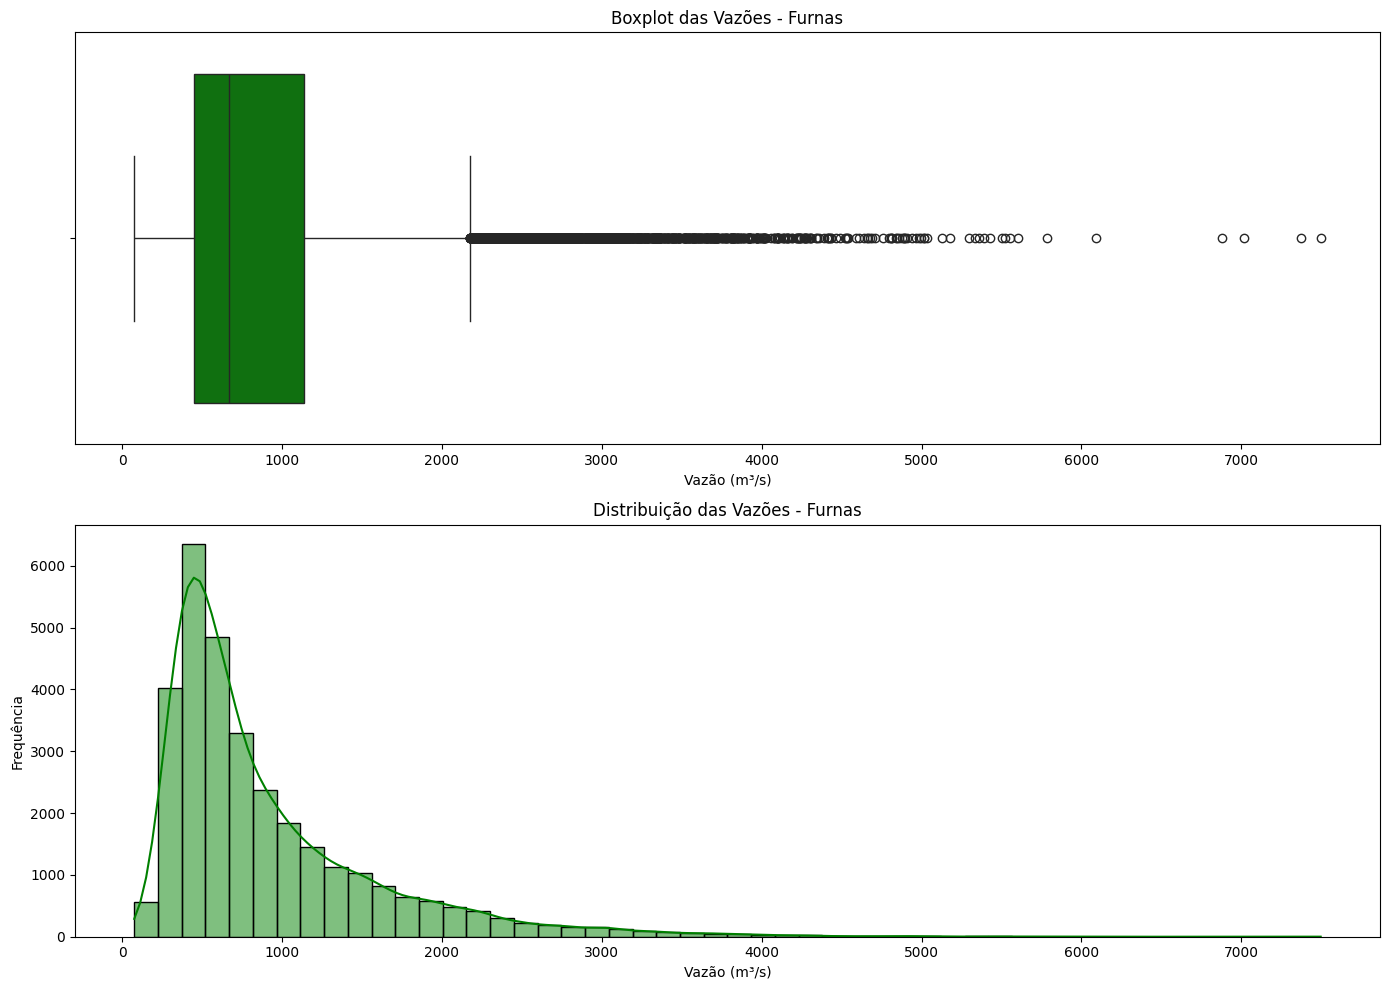

In [200]:
# Estatísticas descritivas
print("📊 Estatísticas descritivas:")
print(df['vazao'].describe())

# Boxplot + Histograma
fig, axes = plt.subplots(2, 1, figsize=(14,10))

sns.boxplot(x=df['vazao'], color="green", ax=axes[0])
axes[0].set_title("Boxplot das Vazões - Furnas")
axes[0].set_xlabel("Vazão (m³/s)")

sns.histplot(df['vazao'], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribuição das Vazões - Furnas")
axes[1].set_xlabel("Vazão (m³/s)")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [201]:
print(df)


              data    vazao
0              NaN      NaN
1       1/jan/1931  1996.00
2       2/jan/1931  1959.00
3       3/jan/1931  1937.00
4       4/jan/1931  1837.00
...            ...      ...
31408  27/dez/2016   548.79
31409  28/dez/2016   526.43
31410  29/dez/2016   519.20
31411  30/dez/2016   518.89
31412  31/dez/2016   498.37

[31413 rows x 2 columns]


### Tratamento nulos e zeros

In [202]:
# Instâncias nulas
null = df['vazao'].isna().sum()

# Instâncias iguais a zero
zero = (df['vazao'] == 0).sum()

print(f" Valores nulos: {null}")
print(f" Valores iguais a zero: {zero}")

 Valores nulos: 1
 Valores iguais a zero: 0


In [203]:
# Remover valores nulos
df = df.dropna(subset=['vazao'])

null = df['vazao'].isna().sum()

print(f" Valores nulos: {null}")

 Valores nulos: 0


In [204]:
# ordenando os valores por data e definindo ela como índice
df['data'] = pd.to_datetime(df['data'], format='%d/%b/%Y')
df.set_index(keys=['data'], drop=True, inplace=True)
df.head()

,vazao
data,
1931-01-01,1996.0
1931-01-02,1959.0
1931-01-03,1937.0
1931-01-04,1837.0
1931-01-05,1713.0


## Modelagem

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adagrad, RMSprop
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

# Deslocamento dos dados 15 pra esq 7 pra dir é apenas no 
# 

In [ ]:
# def ajustar_dados(dataset : pd.DataFrame, qntd_entrada : int, qntd_saida = 7):

#   # quantidade total de linhas do dataset
#   qntd_valores = dataset.shape[0]

#   tam_amostra = qntd_entrada + qntd_saida

#   # periodo vai ser usado para dividir dataset tem treino validacao e teste (dias)
#   dict_df = {'periodo' : []}

#   cont_entrada = -qntd_entrada
#   cont_saida = 1

#   # cria as colunas corretas para dict_df, para entradas (negativo) e saídas (positivo)
#   for i in range(tam_amostra):
#     if cont_entrada < 0:
#       dict_df.update({f'dia {cont_entrada + 1}' : []})
#       cont_entrada += 1
#     else:
#       dict_df.update({f'dia {cont_saida}' : []})
#       cont_saida += 1


#   # calcula a periodo correto para cada amostra e adiciona os valores corretos de vazao para cada dia da amostra
#   for i in range(tam_amostra, qntd_valores - tam_amostra):
#     for j , key in enumerate(dict_df.keys()):

#       if key == 'periodo':
#         inicio = dataset.index[i]
#         fim = dataset.index[i+tam_amostra]
#         periodo = f'{inicio} - {fim}'
#         dict_df.get('periodo').append(periodo)

#       else:
#         vazao = dataset['vazao'].iloc[i + j]
#         dict_df.get(key).append(vazao)

#   df = pd.DataFrame(dict_df)
#   return df


def ajustar_dados(dataset: pd.DataFrame, qntd_entrada: int, qntd_saida=7):
    """
    Ajusta dataset para formato de janelas deslizantes.
    Agora inclui coluna 'data_inicio' para facilitar filtragem.
    """
    qntd_valores = dataset.shape[0]
    tam_amostra = qntd_entrada + qntd_saida

    dict_df = {'data_inicio': [], 'periodo': []}

    # Criar colunas para dias
    for i in range(-qntd_entrada + 1, qntd_saida + 1):
        dict_df[f'dia {i}'] = []

    # Gerar todas as janelas possíveis
    for i in range(qntd_valores - tam_amostra + 1):
        # ✅ CORRIGIDO: pegar data do índice ou da coluna
        if 'data' in dataset.columns:
            data_inicio = dataset['data'].iloc[i]
        else:
            data_inicio = dataset.index[i]
        
        dict_df['data_inicio'].append(data_inicio)
        
        # Período (para referência visual)
        inicio_str = dataset.index[i]
        fim_str = dataset.index[i + tam_amostra - 1]
        dict_df['periodo'].append(f'{inicio_str} - {fim_str}')
        
        # Valores de vazão
        for j, key in enumerate(list(dict_df.keys())[2:]):
            vazao = dataset['vazao'].iloc[i + j]
            dict_df[key].append(vazao)

    df_resultado = pd.DataFrame(dict_df)
    return df_resultado

In [ ]:

# def mlp_camadas(n_entradas, n_camadas, n_escondidas, otimizacao, n_saidas=7):
#     model = Sequential()
#     model.add(Input(shape=(n_entradas,)))
    
#     # adiciona N camadas escondidas
#     for _ in range(n_camadas):
#         model.add(Dense(n_escondidas, activation='relu'))
    
#     # camada de saída 
#     model.add(Dense(n_saidas))
    
#     model.compile(
#         optimizer=otimizacao,
#         loss='mse',
#         metrics=['mae']
#     )
#     return model

def mlp_camadas(n_entradas, n_camadas, n_escondidas, otimizacao, n_saidas):

    model = Sequential()
    # camada de entrada
    model.add(Input(shape=(n_entradas,)))

    # camadas intermediárias adicionais, se houver
    for _ in range(n_camadas - 1):
        model.add(Dense(n_escondidas, activation='relu'))

    # camada de saída (linear para regressão)
    model.add(Dense(n_saidas, activation='linear'))

    model.compile(optimizer=otimizacao, loss='mse', metrics=['mae'])
    return model


In [225]:
def treinar(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    historico = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return historico


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error 

def testar(model, X_test, y_test):

    # reconvertendo para numpy
    y_pred = model.predict(X_test).squeeze()
    y_test_np = y_test.numpy().squeeze()

    mse = mean_squared_error(y_test_np, y_pred)
    mae = mean_absolute_error(y_test_np, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_np, y_pred)
    mape = mean_absolute_percentage_error(y_test_np, y_pred)


    # print(f'MSE : {mse:.4f}')
    # print(f'MAE : {mae:.4f}')a
    # print(f'RMSE: {rmse:.4f}')
    # print(f'R²  : {r2:.4f}')

    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape} # 'EMPA': epma
 


def avaliar_modelo(model, X_val, y_val, scaler_y=None, verbose=False):
    """
    Avalia o modelo em um conjunto de validação/teste.
    Retorna MSE, MAE, RMSE, R2 e EPMA.
    """
    # Converter tensores para numpy se necessário
    if isinstance(y_val, tf.Tensor):
        y_val = tf.make_ndarray(y_val)
    if isinstance(X_val, tf.Tensor):
        X_val = tf.make_ndarray(X_val)

    # Predição
    y_pred = model.predict(X_val, verbose=0)

    # Reverter normalização (mantendo o formato correto)
    if scaler_y is not None:
        if y_pred.ndim == 1:
            y_pred = y_pred.reshape(-1, 1)
        if y_val.ndim == 1:
            y_val = y_val.reshape(-1, 1)

        y_pred = scaler_y.inverse_transform(y_pred)
        y_val = scaler_y.inverse_transform(y_val)

    # Achatar para métricas
    y_pred = y_pred.flatten()
    y_true = y_val.flatten()

    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    if verbose:
        print(f"MSE : {mse:.4f}")
        print(f"MAE : {mae:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²  : {r2:.4f}")
        print(f"EPMA: {mape:.2f}%")

    return {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape
    }

In [228]:
#tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit


def cross_val_time_series_single(
    df,
    otimizacao,
    n_entradas=15,
    n_splits=3,
    n_camadas=1,
    n_escondidas=20,
    n_saidas=7,
    epochs=75,
    batch_size=64
):
    """
    Realiza validação cruzada temporal completa com TimeSeriesSplit
    para um único tamanho de janela (n_entradas).

    Args:
        df (pd.DataFrame): Dataset base.
        n_entradas (int): Tamanho da janela de entrada (ex: 15, 30, 45).
        n_splits (int): Número de divisões na validação cruzada temporal.
        n_camadas (int): Número de camadas ocultas no MLP.
        n_escondidas (int): Número de neurônios em cada camada oculta.
        otimizacao: Otimizador (ex: Adagrad()).
        n_saidas (int): Número de saídas previstas.
        epochs (int): Número de épocas de treino.
        batch_size (int): Tamanho do batch.

    Returns:
        pd.DataFrame: Resultados consolidados com métricas por fold.
    """

    if 'data' in df.columns:
        df_treino_val = df[df['data'].dt.year <= 2010].copy()
    elif 'data_inicio' in df.columns:
        df_treino_val = df[df['data_inicio'].dt.year <= 2010].copy()
    else:
        # Se não tem coluna data, usar todo o dataset (fallback)
        df_treino_val = df.copy()

    resultados_folds = []

    # Gerar dataset ajustado (função já existente)
    df_n = ajustar_dados(df_treino_val, n_entradas)
    
    print("dados ajustados")
    # Colunas de entrada e saída
    col_x = [f"dia {i}" for i in range(-(n_entradas - 1), 1)]
    col_y = [f"dia {i}" for i in range(1, n_saidas + 1)]

    X = df_n[col_x].values
    y = df_n[col_y].values

    # Normalização
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_norm = scaler_X.fit_transform(X)
    y_norm = scaler_y.fit_transform(y)

    # Validação cruzada temporal
    tscv = TimeSeriesSplit(n_splits=n_splits)

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_norm)):
        print(f"Fold {fold + 1}/{n_splits} — entradas: {n_entradas}")

        X_train, X_val = X_norm[train_idx], X_norm[val_idx]
        y_train, y_val = y_norm[train_idx], y_norm[val_idx]

        otimizador_novo = otimizacao

        # Criar e treinar modelo
        model = mlp_camadas(n_entradas, n_camadas, n_escondidas, otimizador_novo, n_saidas=n_saidas)

        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=5,          # para se não melhorar por 10 épocas
            restore_best_weights=True,
            verbose=0
        )
        
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0,
            callbacks=[early_stop]

        )
        # Avaliar
        metricas = avaliar_modelo(model, X_val, y_val, scaler_y)
        metricas['Fold'] = fold + 1
        resultados_folds.append(metricas)

    
    return resultados_folds


## Treinar e testar com diferentes entradas e neuronios nas camadas escondidas

In [ ]:
resultados_15 = cross_val_time_series_single(df, n_entradas=45, n_escondidas=40, otimizacao=Adagrad(learning_rate=0.1))
print(resultados_15)


dados ajustados
Fold 1/3 — entradas: 30
Fold 2/3 — entradas: 30
Fold 3/3 — entradas: 30
[{'MSE': 90404.23652590298, 'MAE': 165.81859596237436, 'RMSE': np.float64(300.6729727226958), 'R2': 0.7909830544069878, 'MAPE': 0.17708613547993213, 'Fold': 1}, {'MSE': 115344.21659365617, 'MAE': 204.40720375907512, 'RMSE': np.float64(339.6236396272441), 'R2': 0.7904396162193462, 'MAPE': 0.19424499779058593, 'Fold': 2}, {'MSE': 98950.91934965503, 'MAE': 189.03205395485887, 'RMSE': np.float64(314.56465050869116), 'R2': 0.7663131156931845, 'MAPE': 0.2808818268889036, 'Fold': 3}]


melhor modelo geral - média e desvio padrão

In [ ]:

resultados = []

# hiperparâmetros
# entradas = [15, 30, 60]
# camadas = [1, 2]
# neuronios = [20, 40, 60]
# otimizadores = {
#     'Adagrad': Adagrad(learning_rate=0.1),
#     'RMSprop': RMSprop(learning_rate=0.1)
# }

entradas = [15]
camadas = [1]
neuronios = [20]
otimizadores = {
    'Adagrad': Adagrad(learning_rate=0.1),
    'RMSprop': RMSprop(learning_rate=0.1)
}

# loop geral
for nome_opt, opt in otimizadores.items():
    for n_entradas in entradas:
        for n_camadas in camadas:
            for n_escondidas in neuronios:
                
                print(f"Treinando: Entradas={n_entradas}, Camadas={n_camadas}, "
                      f"Neurônios={n_escondidas}, Otimizador={nome_opt}")

                # chama a função principal de validação cruzada
                resultados_exp = cross_val_time_series_single(
                    df,
                    n_entradas=n_entradas,
                    n_camadas=n_camadas,
                    n_escondidas=n_escondidas,
                    otimizacao=opt
                )

                # Se for lista de dicionários, tira a média ou pega o primeiro
                if isinstance(resultados_exp, list):
                    df_fold = pd.DataFrame(resultados_exp)
                    mape_medio = df_fold['MAPE'].mean()
                    desvio_mape = df_fold['MAPE'].std()
                else:
                    mape_medio = resultados_exp.get('MAPE', np.nan)
                    desvio_mape = np.nan

                resultados.append({
                    "entradas": n_entradas,
                    "camadas": n_camadas,
                    "neurônios": n_escondidas,
                    "otimizador": nome_opt,
                    "MAPE_médio": mape_medio,
                    "Desvio_MAPE": desvio_mape
                })


# converte para dataframe
df_resultados = pd.DataFrame(resultados)

# Encontrar o melhor modelo: menor MAPE médio, e em caso de empate, menor desvio padrão
melhor_modelo = df_resultados.sort_values(
    by=["MAPE_médio", "Desvio_MAPE"], ascending=[True, True]
).iloc[0]

# Exibir resultados
print("\n🏆 MELHOR MODELO ENCONTRADO 🏆")
print(f"Entradas: {melhor_modelo['entradas']}")
print(f"Camadas: {melhor_modelo['camadas']}")
print(f"Neurônios: {melhor_modelo['neurônios']}")
print(f"Otimizador: {melhor_modelo['otimizador']}")
print(f"MAPE Médio: {melhor_modelo['MAPE_médio']:.4f}")
print(f"Desvio Padrão do MAPE: {melhor_modelo['Desvio_MAPE']:.4f}")

print("\n📊 Top 10 Modelos com Menor MAPE Médio:")
display(df_resultados.sort_values(by=['MAPE_médio', 'Desvio_MAPE']).head(10))

Treinando: Entradas=15, Camadas=1, Neurônios=20, Otimizador=Adam
dados ajustados
Fold 1/3 — entradas: 15
Fold 2/3 — entradas: 15
Fold 3/3 — entradas: 15
Treinando: Entradas=15, Camadas=1, Neurônios=20, Otimizador=RMSprop
dados ajustados
Fold 1/3 — entradas: 15
Fold 2/3 — entradas: 15
Fold 3/3 — entradas: 15

🏆 MELHOR MODELO ENCONTRADO 🏆
Entradas: 15
Camadas: 1
Neurônios: 20
Otimizador: RMSprop
MAPE Médio: 0.1883
Desvio Padrão do MAPE: 0.0326

📊 Top 10 Modelos com Menor MAPE Médio:


,entradas,camadas,neurônios,otimizador,MAPE_médio,Desvio_MAPE
1,15,1,20,RMSprop,0.188347,0.032562
0,15,1,20,Adam,0.198908,0.039786


In [ ]:
y_test_np = y_test.numpy() #para ajudar na criação dos graficos comparativos depois
def grafico_dispersao(y_test, y_pred):
    """Gráfico de dispersão: Real vs Previsto"""
    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Dispersão: Real vs Previsto')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.grid(True)
    plt.show()
    
y_pred = model_15_1_20.predict(X_test).squeeze()
grafico_dispersao(y_test_np, y_pred)

NameError: name 'y_test' is not defined